# Zillow Bestimate
## Exploration Notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import acquire
import prepare
import explore
from scipy.stats import pearsonr, spearmanr

In [3]:
# let's bring in the data
df = prepare.prep_zillow()

In [4]:
acquire.overview(df)

This dataframe has 23937 rows and 8 columns.
----------------------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23937 entries, 11721753 to 10713993
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bath             23937 non-null  float64
 1   bed              23937 non-null  int64  
 2   sqft_calc        23937 non-null  int64  
 3   fips             23937 non-null  int64  
 4   yearbuilt        23937 non-null  int64  
 5   appraised_value  23937 non-null  int64  
 6   tax_amount       23937 non-null  float64
 7   age              23937 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 1.6 MB
None
----------------------------------

Unique value counts of each column

bath                   7
bed                    4
sqft_calc           2754
fips                   3
yearbuilt            107
appraised_value    19171
tax_amount         23534
age                  107
dtype: int64
-

In [ ]:
# let's plot some continuous variables...
col_list = df.drop(columns='fips').columns.to_list()

In [ ]:
def zillow_hist(df):
    for col in col_list:
        df[col].hist(grid=False, bins=10)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

In [6]:
# split our data...
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.zillow_split(df, 'appraised_value')

In [8]:
# correlation matrix
zillow_corr = train.drop(columns=['appraised_value', 'tax_amount', 'fips', 'yearbuilt']).corr()
zillow_corr

,bath,bed,sqft_calc,age
bath,1.000000,0.581395,0.779051,-0.559143
bed,0.581395,1.000000,0.600549,-0.378277
sqft_calc,0.779051,0.600549,1.000000,-0.501281
age,-0.559143,-0.378277,-0.501281,1.000000


In [ ]:
# heatmap
# heatmap

plt.figure(figsize=(8,6))
sns.heatmap(zillow_corr, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(zillow_corr))

plt.show()

In [ ]:
sns.lmplot(x="sqft_calc", y="appraised_value", data=train, line_kws={'color': 'red'})
plt.show()

In [ ]:
def zillow_lmplot(df):
    col_list = ['sqft_calc', 'age']
    for col in col_list:
        sns.lmplot(x=col, y="appraised_value", data=train, line_kws={'color': 'red'})
        plt.xlabel(col)
        plt.ylabel('Appraised Value')
        plt.show()

In [ ]:
zillow_lmplot(train)

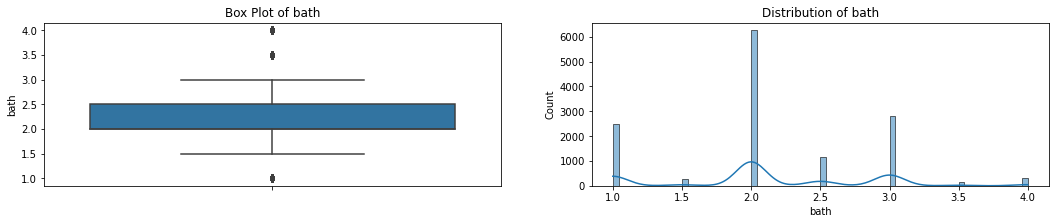

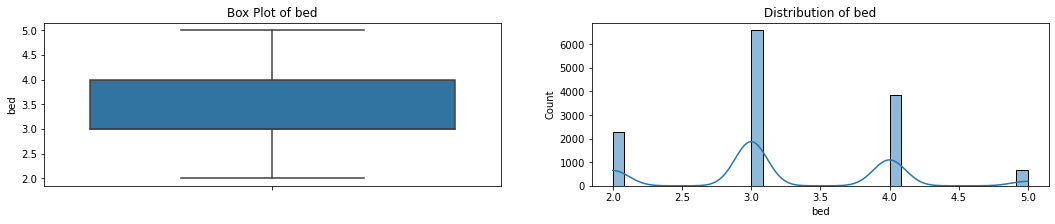

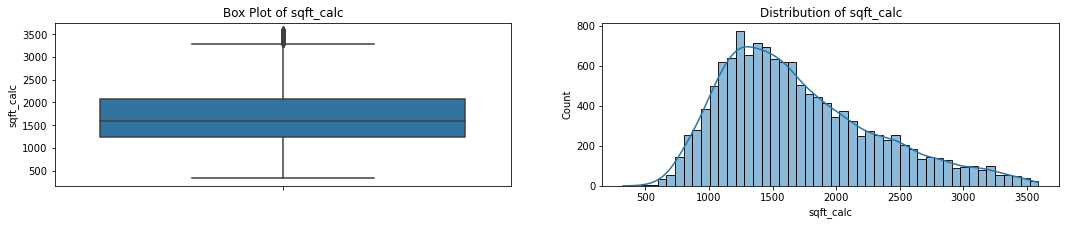

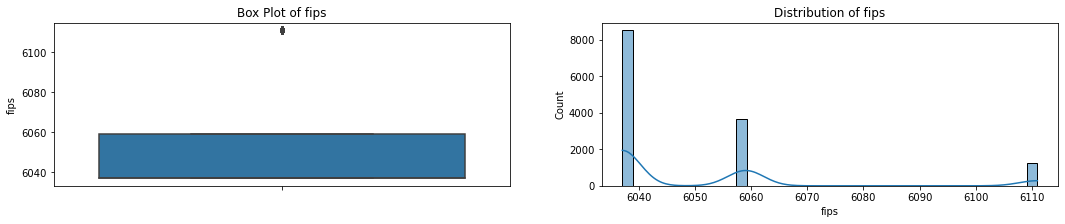

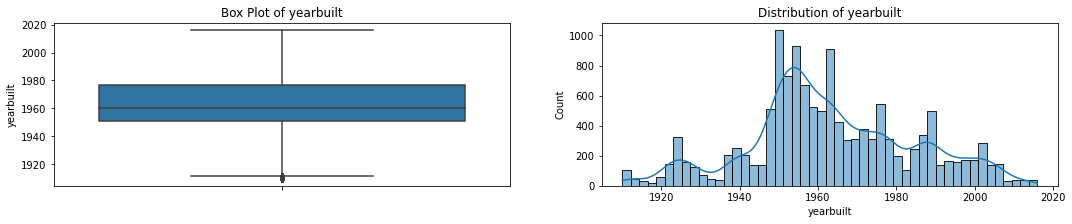

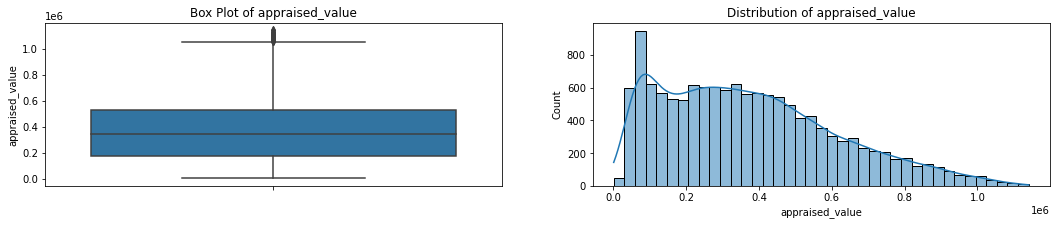

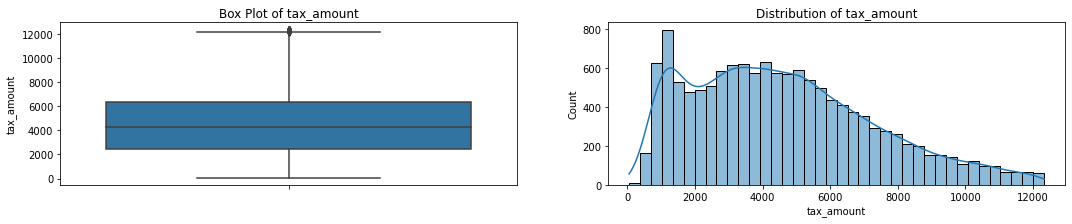

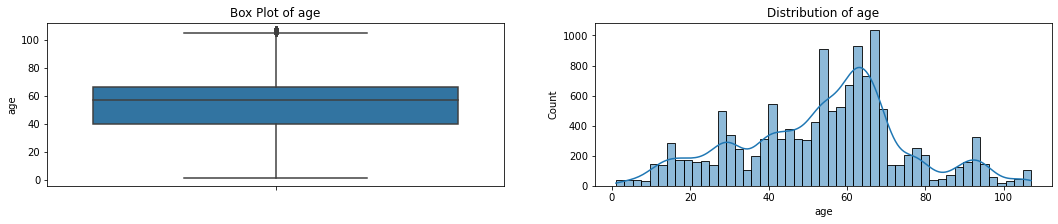

In [7]:
explore.explore_univariate(train)